In [1]:
# !pip install art

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()



x_test = np.load('/home/jovyan/UNSW/x_test.npy',allow_pickle=True)
x_train = np.load('/home/jovyan/UNSW/x_train.npy',allow_pickle=True)
x_val = np.load('/home/jovyan/UNSW/x_val.npy',allow_pickle=True)
y_test = np.load('/home/jovyan/UNSW/y_test.npy',allow_pickle=True)
y_train = np.load('/home/jovyan/UNSW/y_train.npy',allow_pickle=True)
y_val = np.load('/home/jovyan/UNSW/y_val.npy',allow_pickle=True)

2024-02-27 22:46:52.332590: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 22:46:52.378907: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 22:46:52.378982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 22:46:52.380653: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 22:46:52.388501: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 22:46:52.389128: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Input(shape=input_shape))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))

dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
classifier = KerasClassifier(model=dnn_model, use_logits=False)
classifier.fit(x_train, y_train, nb_epochs=10, batch_size=64,validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

2024-02-27 22:46:56.330438: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-27 22:46:56.368254: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-02-27 22:46:56.389611: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_2/kernel/Assign' id:63 op device:{requested: '', assigned: ''} def:{{{node dense_2/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_2/kernel, dense_2/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a f

Test accuracy: 0.88235605


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-02-27 22:47:15.545772: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_2/Softmax' id:74 op device:{requested: '', assigned: ''} def:{{{node dense_2/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_2/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


epsilon = 0.1
FPR: [0.60529064 0.62881868]
TPR: [0.37118132 0.39470936]
FNR: [0.62881868 0.60529064]
TNR: [0.39470936 0.37118132]
Accuracy: 0.3871949881987523
Precision(micro,macro,weighted): 0.3871949881987523,0.3978397370697648,0.4608345560676738
F1(micro,macro,weighted: 0.3871949881987523,0.37307033433989856,0.40706379456219755
FPR: 0.6170546591417632
tpr: 0.38294534085823684
fnr: 0.6170546591417632
tnr: 0.38294534085823684


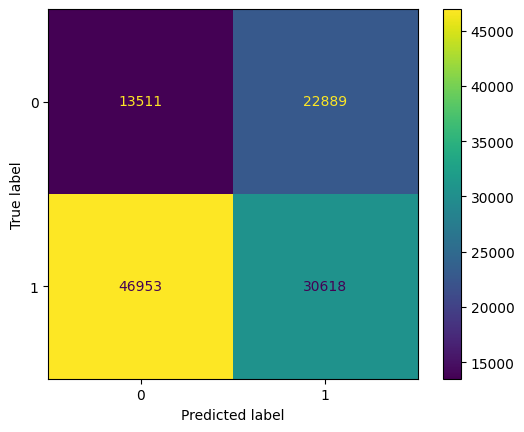

epsilon = 0.15
FPR: [0.73563574 0.9278022 ]
TPR: [0.0721978  0.26436426]
FNR: [0.9278022  0.73563574]
TNR: [0.26436426 0.0721978 ]
Accuracy: 0.20299023435786295
Precision(micro,macro,weighted): 0.20299023435786295,0.21091662762094496,0.2712043676974919
F1(micro,macro,weighted: 0.20299023435786295,0.18288159316920577,0.22918691597127552
FPR: 0.8317189689814124
tpr: 0.16828103101858757
fnr: 0.8317189689814124
tnr: 0.16828103101858757


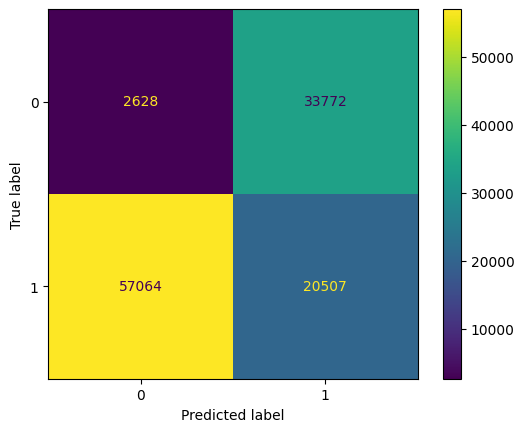

epsilon = 0.2
FPR: [0.93507883 0.98865385]
TPR: [0.01134615 0.06492117]
FNR: [0.98865385 0.93507883]
TNR: [0.06492117 0.01134615]
Accuracy: 0.04781040791078432
Precision(micro,macro,weighted): 0.04781040791078432,0.06421098492232134,0.0853614361718747
F1(micro,macro,weighted: 0.04781040791078432,0.046241137971784564,0.060216567921721635
FPR: 0.9618663385801395
tpr: 0.03813366141986052
fnr: 0.9618663385801395
tnr: 0.03813366141986052


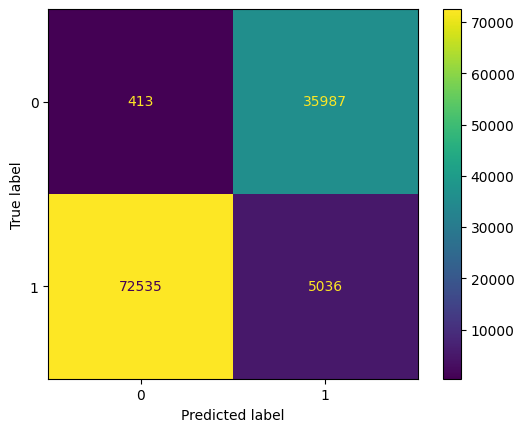

epsilon = 0.25
FPR: [0.99993554 0.99917582]
TPR: [8.24175824e-04 6.44570780e-05]
FNR: [0.99917582 0.99993554]
TNR: [6.44570780e-05 8.24175824e-04]
Accuracy: 0.00030709566468663084
Precision(micro,macro,weighted): 0.00030709566468663084,0.0002620374557869476,0.00021703390132177556
F1(micro,macro,weighted: 0.00030709566468663084,0.00030704756326300564,0.0002278322147801353
FPR: 0.9995556835488962
tpr: 0.00044431645110378144
fnr: 0.9995556835488962
tnr: 0.00044431645110378144


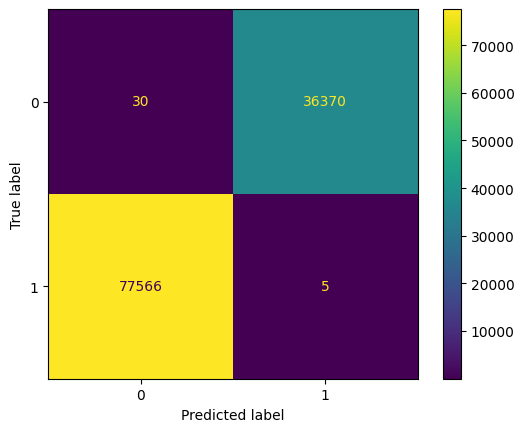

epsilon = 0.3
FPR: [1.         0.99997253]
TPR: [2.74725275e-05 0.00000000e+00]
FNR: [0.99997253 1.        ]
TNR: [0.00000000e+00 2.74725275e-05]
Accuracy: 8.774161848189452e-06
Precision(micro,macro,weighted): 8.774161848189452e-06,6.445624709946888e-06,4.11720068161316e-06
F1(micro,macro,weighted: 8.774161848189452e-06,8.774084862948794e-06,5.6045255198486646e-06
FPR: 0.9999862637362638
tpr: 1.3736263736263736e-05
fnr: 0.9999862637362638
tnr: 1.3736263736263736e-05


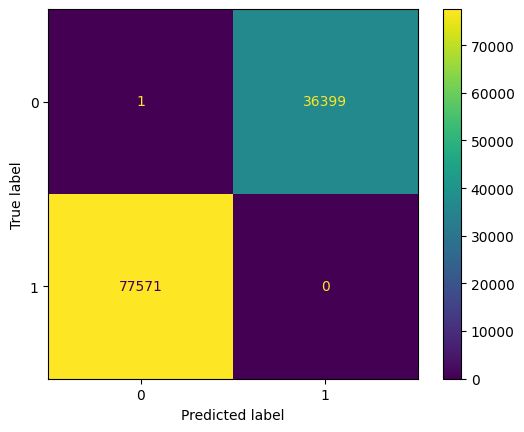

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from art.attacks.evasion import ProjectedGradientDescent

epsilon_values = [0.1, 0.15, 0.2, 0.25, 0.3]

# Iterate over epsilon values
for epsilon in epsilon_values:
    # Craft adversarial samples with FGSM
    adv_crafter = ProjectedGradientDescent(classifier, eps=epsilon, batch_size=64, verbose=False)
    x_test_adv = adv_crafter.generate(x=x_test, y=y_test)

    # Evaluate the classifier on the adversarial examples
    preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    # acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    # print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    # tn, fp, fn, tp = conf_matrix.ravel()
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : "dnn",
        "attack_model" : "pgd",
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/UNSW/modeldnn.csv", mode='a', index=False)
